The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[10.  8. 11.  7.  7.]
 [10.  8. 11.  7.  7.]
 [10.  8. 11.  7.  7.]]


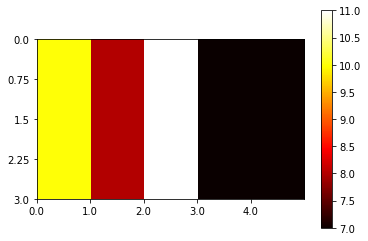

pressure correction
 [[4.e+00 2.e+00 3.e+00 3.e-20]
 [4.e+00 2.e+00 3.e+00 3.e-20]
 [4.e+00 2.e+00 3.e+00 3.e-20]]


velocity after first iteration:


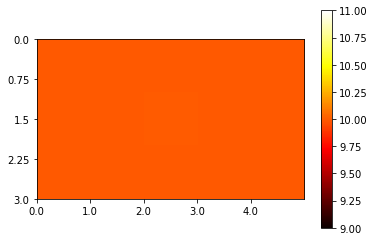

[[10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]]

pressure correction
 [[-5.66091740e-16 -4.88010121e-16 -9.76020241e-17 -9.76020241e-37]
 [-6.44173359e-16 -8.00336598e-16  1.95204048e-16  1.95204048e-36]
 [-5.66091740e-16 -4.88010121e-16 -9.76020241e-17 -9.76020241e-37]]


velocity after second iteration:


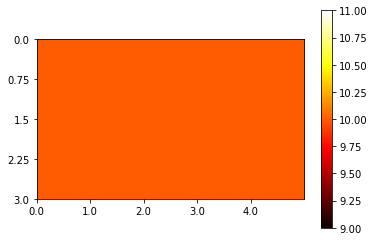

[[10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]]


In [4]:
%reset -f
%load_ext autoreload
%autoreload 2

import Odin
from fieldAccess import *

# Versteeg example 6.1


geom = Odin.createGeometry( 'rectangle', [4,3] )
mesh = Odin.createMesh( geom, res=1 )

# make just a list, give a name as optional parameter to flow model
# make this a flowmodeles constructor with kwargs here and then remove simulation instance
myFlowModels = {
    'u' : Odin.TransportModels.staggeredTransport_u,
    'v' : Odin.TransportModels.staggeredTransport_v,
    'p' : Odin.PressureModels.Pressure
}

passiveFields = {}

Odin.initialize(flowmodels=myFlowModels, mesh=mesh, geometry=geom, passiveFields=passiveFields )

u=Odin.getField('u')
v=Odin.getField('v')
p=Odin.getField('p')

# relates to viscosity:
u.govModel.setDiffusionCoefficient(0.1)
v.govModel.setDiffusionCoefficient(0.1)

u.data[internal_u] = [[8,11,7]]
Odin.defineBoundaryCondition(field=u, boundaryName='top', type='zeroGradient')
Odin.defineBoundaryCondition(field=u, boundaryName='bottom', type='zeroGradient')
Odin.defineBoundaryCondition(field=u, boundaryName='right', type='zeroGradient')
Odin.defineBoundaryCondition(field=u, boundaryName='left', type='fixedValue', value=10)

v.data.fill(0.0)
Odin.defineBoundaryCondition(field=v, boundaryName='top', type='fixedValue', value=0)
Odin.defineBoundaryCondition(field=v, boundaryName='bottom', type='fixedValue', value=0)
Odin.defineBoundaryCondition(field=v, boundaryName='left', type='zeroGradient' )
Odin.defineBoundaryCondition(field=v, boundaryName='right', type='zeroGradient')

p.data.fill(0)
Odin.defineBoundaryCondition(field=p, boundaryName='top', type='freeFlow')
Odin.defineBoundaryCondition(field=p, boundaryName='bottom', type='freeFlow')
Odin.defineBoundaryCondition(field=p, boundaryName='left', type='freeFlow' )
Odin.defineBoundaryCondition(field=p, boundaryName='right', type='constantPressure', value=0)


# assumption from example:
u.govModel.a_p.fill(1)
v.govModel.a_p.fill(1)

print(u.data)
Odin.display(u,mesh)

p_correction = Odin.solve(p)
print("pressure correction\n", p_correction)

p.data += p_correction
u.data[internal_u] +=  p.govModel.d_u[internal_u] * ( p_correction[west]- p_correction[east] )
u.data[boundary_east] = u.data[boundary_nb1_east]

print("\n\nvelocity after first iteration:")
Odin.display(u,mesh)
print(u.data)

p_correction = Odin.solve(p)
print("\npressure correction\n", p_correction)

p.data += p_correction
u.data[internal_u] +=  p.govModel.d_u[internal_u] * ( p_correction[west]- p_correction[east] )
u.data[boundary_east] = u.data[boundary_nb1_east]

print("\n\nvelocity after second iteration:")
Odin.display(u,mesh)
print(u.data)



In [ ]:
# shutting the interpreter down, so I can a fresh instance next time.
# my modules are automatically checked for updates
import os
os._exit(00)